In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


Test para probar actualizacion de datos

# AR simulation

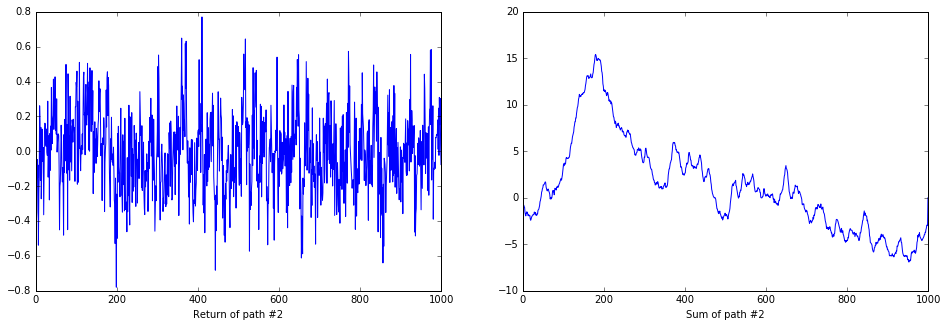

In [15]:
nstep = 1000
paths = 1000
phi0 = 0
phi1 = 0.2
phi2 =  0.4
rt = np.random.randn(nstep, paths)
at = np.random.randn(nstep, paths)*0.2
sumt = np.zeros((nstep, paths))
for i in range(nstep-2):
    rt[i+2] = phi0 + phi1*rt[i+1] +phi2*rt[i] + at[i+2] 
    sumt[i+1] = sumt[i]+rt[i+2] 
#plt.plot(rt[:,1])
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
plt.plot(rt[:,2])
plt.xlabel('Return of path #2')
ax1 = fig.add_subplot(122)
plt.plot(sumt[:,2])
plt.xlabel('Sum of path #2')
plt.show()

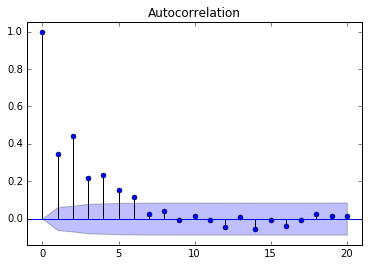

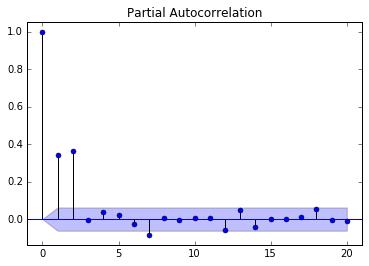

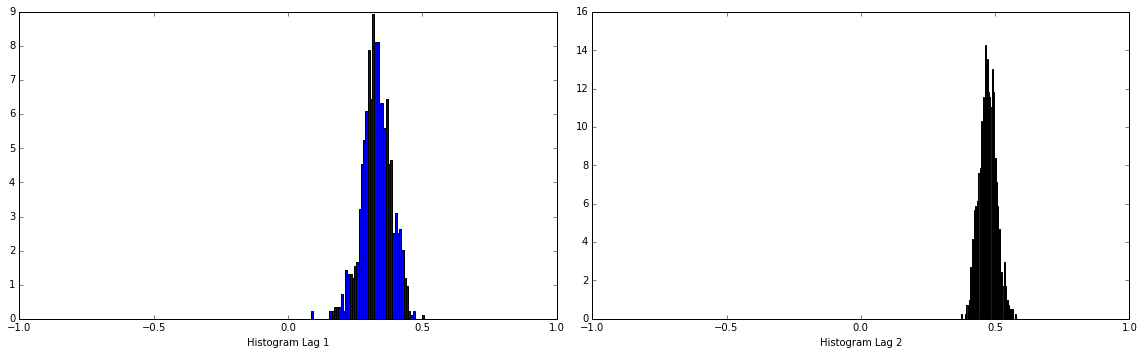

In [16]:
rtp = pd.DataFrame(rt)
atp = pd.DataFrame(at)
tsaplots.plot_acf(rtp[2], lags=20);
tsaplots.plot_pacf(rtp[2], lags = 20)



fig = plt.figure(figsize=(16,5))

#ax0 = fig.add_subplot(311)
#ax = plt.gca()
#ax.set_xlabel('AFC for Path #2')


ax1 = fig.add_subplot(121)
lag1 = [rtp[i].autocorr(lag=1) for i in range(paths)]
hist, bins = np.histogram(lag1,bins=50, density = True)
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, width=width)
ax = plt.gca()
ax.set_xlim([-1,1]), ax.set_xlabel('Histogram Lag 1')



fit = stats.norm.pdf(np.linspace(0,0.4,100), phi1, 1/nstep)
#plt.plot(np.linspace(0,0.4,100), fit)

ax2 = fig.add_subplot(122)
lag2 = [rtp[i].autocorr(lag=2) for i in range(paths)]

hist, bins = np.histogram(lag2,bins=50, density = True)
width =  (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
axes = plt.gca()
axes.set_xlim([-1,1]), axes.set_xlabel('Histogram Lag 2')
plt.bar(center, hist, width=width)

#fit = stats.norm.pdf(np.linspace(0.4,0.8,100), phi2, 1/nstep)
#plt.plot(np.linspace(0.4,0.8,100), fit,'r')
#plt.stem([atp[5].autocorr(lag=i) for i in range(20)])
plt.tight_layout()
plt.show()

# AR Model

In [17]:
#linear regression
AR1 = sm.tsa.ARMA(rt[:,31], (2,0))
fit1 = AR1.fit()
fit1.summary()

#fig = plt.figure(figsize=(16,4))
#plt.plot(fit1.fittedvalues)
#plt.plot(rt[0])

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 151.000
Method:                       css-mle   S.D. of innovations              0.208
Date:                Tue, 06 Sep 2016   AIC                           -293.999
Time:                        10:55:36   BIC                           -274.368
Sample:                             0   HQIC                          -286.538
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0261      0.016     -1.631      0.103        -0.057     0.005
ar.L1.y        0.1517      0.029      5.223      0.000         0.095     0.209
ar.L2.y        0.4376      0.030     14.794      0.000         0.380     0.496
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3482           +0.0000j            1.3482            0.0000
AR.2           -1.6950           +0.0000j            1.6950            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
raiz = (0.151+ np.sqrt(0.151*0.151 +4*0.4376))/(-2.0*0.4376)

In [23]:
raiz

-1.6940310050515064

In [22]:
print 1/raiz

-0.590307967811


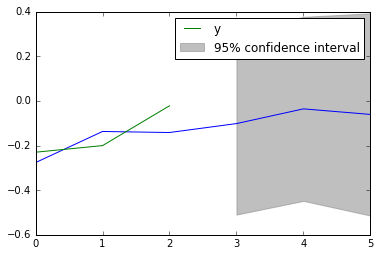

In [39]:
fit1.plot_predict(997,1002,dynamic = False)
plt.show()

## Dane Data

In [40]:
#Real Data
Data = pd.read_csv('data-1.csv', dayfirst = False, decimal =',' , index_col=None, parse_dates=[0])
#Data['Date'] = pd.to_datetime(Data['date'])

Data.describe()

,index,dane
count,70.000000,70.000000
mean,0.909854,0.507857
std,1.884844,0.670515
min,-2.915657,-1.000000
25%,-0.413110,0.050000
50%,0.727916,0.410000
75%,1.820389,0.940000
max,7.506650,2.820000


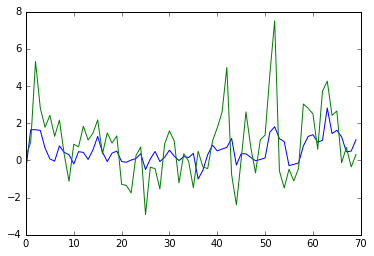

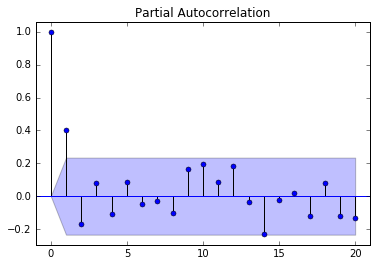

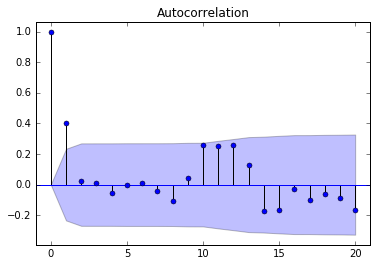

In [50]:
plt.plot(Data['dane'])
plt.plot(Data['index'])
tsaplots.plot_pacf(Data['index'], lags = 20)
tsaplots.plot_acf(Data['index'], lags=20);

In [57]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    ARDane = sm.tsa.ARMA(Data['dane'].values, (12,0))
    Dane = ARDane.fit()
Dane.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                    ARMA(12, 0)   Log Likelihood                 -58.359
Method:                       css-mle   S.D. of innovations              0.500
Date:                Tue, 06 Sep 2016   AIC                            144.718
Time:                        12:16:58   BIC                            176.197
Sample:                             0   HQIC                           157.222
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        140.3843        nan        nan        nan           nan       nan
ar.L1.y        0.5326        nan        nan        nan           nan       nan
ar.L2.y       -0.0742        nan        nan        nan           nan       nan
ar.L3.y       -0.0927      0.002    -51.984      0.000        -0.096    -0.089
ar.L4.y        0.0317        nan        nan        nan           nan       nan
ar.L5.y       -0.0392        nan        nan        nan           nan       nan
ar.L6.y        0.1546   1.41e-06    1.1e+05      0.000         0.155     0.155
ar.L7.y       -0.1134   1.22e-06  -9.28e+04      0.000        -0.113    -0.113
ar.L8.y        0.2313        nan        nan        nan           nan       nan
ar.L9.y       -0.0298        nan        nan        nan           nan       nan
ar.L10.y      -0.0991        nan        nan        nan           nan       nan
ar.L11.y       0.4222        nan        nan        nan           nan       nan
ar.L12.y       0.0761   1.66e-06    4.6e+04      0.000         0.076     0.076
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0000           -0.0000j            1.0000           -0.0000
AR.2             0.8872           -0.5594j            1.0488           -0.0895
AR.3             0.8872           +0.5594j            1.0488            0.0895
AR.4             0.5375           -0.9143j            1.0606           -0.1654
AR.5             0.5375           +0.9143j            1.0606            0.1654
AR.6            -0.0319           -1.0840j            1.0845           -0.2547
AR.7            -0.0319           +1.0840j            1.0845            0.2547
AR.8            -0.6555           -0.8507j            1.0740           -0.3545
AR.9            -0.6555           +0.8507j            1.0740            0.3545
AR.10           -1.1387           -0.2571j            1.1674           -0.4647
AR.11           -1.1387           +0.2571j            1.1674            0.4647
AR.12           -5.7446           -0.0000j            5.7446           -0.5000
------------------------------------------------------------------------------
"""

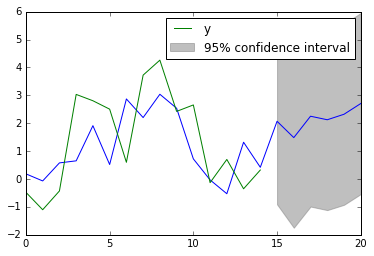

In [54]:
Dane.plot_predict(55,75, dynamic = False)

plt.show()

In [ ]:
Dane.plot_predict(55,70, dynamic = True)

plt.show()

# Error Analysis

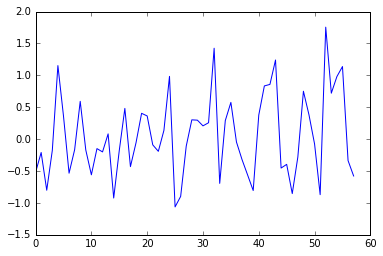

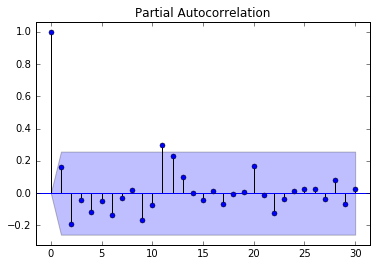

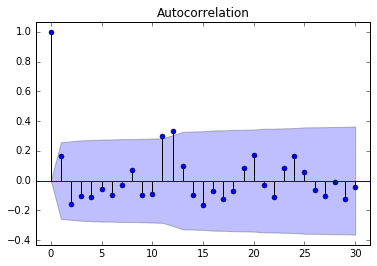

In [58]:
fut = Dane.predict(1,70)
et = (np.roll(Data['dane'].values,1) - fut)[12:70]
#plt.plot(Data['dane'].values)
#plt.plot(fut)
plt.plot(et)
#plt.plot(et-np.roll(et,11))
tsaplots.plot_pacf(et, lags = 30)
tsaplots.plot_acf(et, lags=30);

In [21]:
Dane.predict(1,70)

array([-0.43827401,  1.36298743,  1.24323239,  1.17441539,  0.46548473,
        0.12867552,  0.41867495,  0.63569044,  0.73021774,  0.25611036,
       -0.2544045 ,  0.80604944,  0.98812204,  0.63780967,  0.85095868,
        0.7343059 ,  0.13611129,  0.07596945,  0.47539823,  0.55398962,
       -0.09223556,  0.11348421,  0.46048654,  0.167421  ,  0.29939538,
        0.2777579 ,  0.43271581,  0.25678992, -0.0028069 ,  0.37038574,
        0.22698284,  0.1441652 , -0.13384028,  0.08118936,  0.40045133,
        0.01239569, -0.60123003,  0.06385049,  0.36724398,  0.41681697,
        0.51602742,  0.21286854,  0.40073755,  0.4390619 , -0.244117  ,
        0.4449692 ,  0.07156649, -0.22493183,  0.20603316,  0.30239366,
        0.61164731,  0.9319308 ,  1.14013026,  0.97296478,  0.31259219,
       -0.22887628,  0.17421933,  0.1875027 ,  0.71554865,  1.05047785,
        0.53884785,  0.99887854,  1.05325671,  1.94566189,  1.06165542,
        0.72132272,  0.64298728,  0.12510772,  0.7972128 ,  1.07

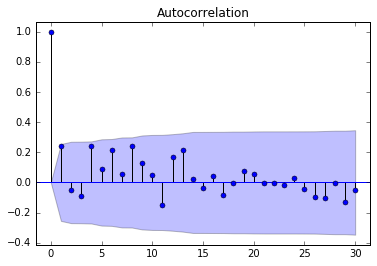

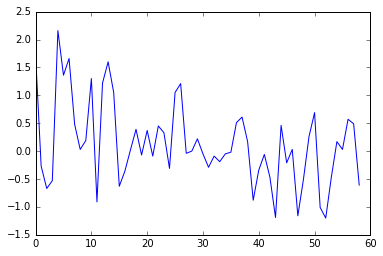

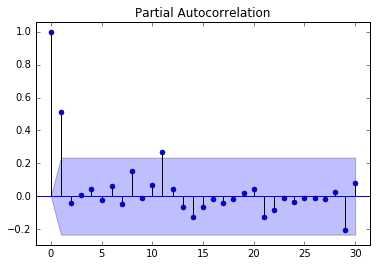

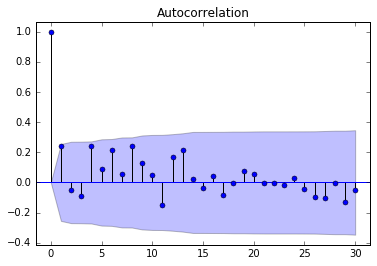

In [49]:
#season adjustment
DaneS =  (np.roll(Data['dane'].values, 11)- Data['dane'].values)[0:70-11]
plt.plot(DaneS)
tsaplots.plot_pacf(Data['dane'], lags = 30)
tsaplots.plot_acf(DaneS, lags=30)

In [55]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    ARDaneS = sm.tsa.ARMA(DaneS,(1,0))
    DaneR = ARDaneS.fit()
DaneR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:                     ARMA(1, 0)   Log Likelihood                 -64.705
Method:                       css-mle   S.D. of innovations              0.724
Date:                Sun, 04 Sep 2016   AIC                            135.410
Time:                        09:25:34   BIC                            141.643
Sample:                             0   HQIC                           137.843
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1429      0.127      1.121      0.267        -0.107     0.393
ar.L1.y        0.2647      0.131      2.024      0.048         0.008     0.521
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.7776           +0.0000j            3.7776            0.0000
-----------------------------------------------------------------------------
"""

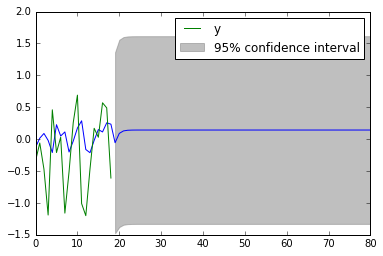

In [57]:
DaneR.plot_predict(40,120, dynamic = False)
plt.show()

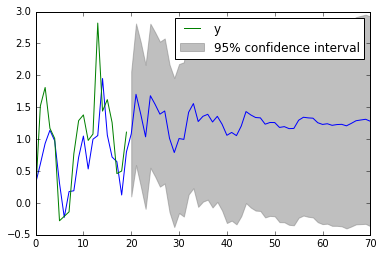

In [45]:
Dane.plot_predict(50,120, dynamic = False)
plt.show()

In [51]:
DaneR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:                    ARMA(11, 0)   Log Likelihood                 -53.604
Method:                       css-mle   S.D. of innovations              0.584
Date:                Sun, 04 Sep 2016   AIC                            133.208
Time:                        09:24:35   BIC                            160.216
Sample:                             0   HQIC                           143.751
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1711      0.232      0.736      0.465        -0.284     0.627
ar.L1.y        0.3910      0.134      2.912      0.005         0.128     0.654
ar.L2.y       -0.2923      0.146     -1.998      0.052        -0.579    -0.006
ar.L3.y       -0.0280      0.149     -0.188      0.851        -0.320     0.264
ar.L4.y        0.2269      0.134      1.690      0.098        -0.036     0.490
ar.L5.y       -0.1642      0.145     -1.134      0.263        -0.448     0.120
ar.L6.y        0.4261      0.138      3.099      0.003         0.157     0.696
ar.L7.y       -0.1037      0.148     -0.701      0.487        -0.394     0.186
ar.L8.y        0.3911      0.149      2.623      0.012         0.099     0.683
ar.L9.y       -0.0021      0.167     -0.012      0.990        -0.329     0.325
ar.L10.y      -0.0307      0.161     -0.191      0.849        -0.346     0.285
ar.L11.y      -0.0924      0.156     -0.593      0.556        -0.398     0.213
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0694           -0.0000j            1.0694           -0.0000
AR.2             0.6794           -0.8141j            1.0603           -0.1393
AR.3             0.6794           +0.8141j            1.0603            0.1393
AR.4             1.5975           -0.0000j            1.5975           -0.0000
AR.5             0.1177           -1.1053j            1.1116           -0.2331
AR.6             0.1177           +1.1053j            1.1116            0.2331
AR.7            -1.0316           -0.0000j            1.0316           -0.5000
AR.8            -0.5968           -1.0654j            1.2212           -0.3313
AR.9            -0.5968           +1.0654j            1.2212            0.3313
AR.10           -1.1841           -1.2494j            1.7214           -0.3707
AR.11           -1.1841           +1.2494j            1.7214            0.3707
------------------------------------------------------------------------------
"""